In [12]:
import pandas as pd

df = pd.read_csv('transaction_data.csv')

print("Размер таблицы:", df.shape)

print("\nТипы переменных:")
print(df.dtypes)

print("\nЧисло пропущенных значений:")
print(df.isnull().sum())

print("\nОписательная статистика:")
print(df.describe())

Размер таблицы: (5315, 3)

Типы переменных:
date           object
name           object
transaction    object
dtype: object

Число пропущенных значений:
date           0
name           0
transaction    0
dtype: int64

Описательная статистика:
                       date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692


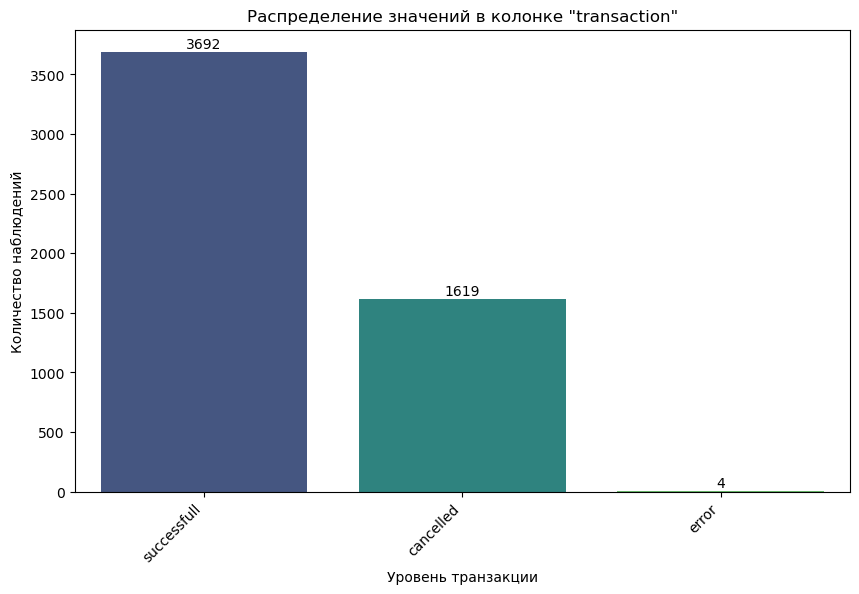

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

transaction_counts = df['transaction'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")
plt.title('Распределение значений в колонке "transaction"')
plt.xlabel('Уровень транзакции')
plt.ylabel('Количество наблюдений')

plt.xticks(rotation=45, ha="right")

for i, value in enumerate(transaction_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

In [15]:
error_transactions_count = df[df['transaction'] == 'error'].shape[0]

print("Количество транзакций с ошибкой:", error_transactions_count)

Количество транзакций с ошибкой: 4


In [16]:
import pandas as pd

file_path = 'transaction_data_updated.csv'
transaction_data_updated = pd.read_csv(file_path)

transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])

print(transaction_data_updated.head())

                 date                name  transaction  minute
0 2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37
1 2020-03-02 00:59:09      Irina_Fedorova  successfull      59
2 2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6
3 2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2
4 2020-03-02 00:17:52      Julia_Smirnova    cancelled      17


In [17]:
import pandas as pd

transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])

transaction_data_updated['minute'] = transaction_data_updated['date'].dt.minute
transaction_data_updated['user'] = transaction_data_updated['name']

user_vs_minute_pivot = pd.pivot_table(
    transaction_data_updated,
    values='transaction',
    index='minute',
    columns='user',
    aggfunc='count',
    fill_value=0
)

print(user_vs_minute_pivot)

user    Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
minute                                                             
0                        3                  4                  2   
1                        4                  4                  0   
2                        1                  2                  4   
3                        3                  0                  2   
4                        3                  0                  0   
5                        3                  0                  2   
6                        4                  1                  2   
7                        3                  2                  1   
8                        2                  4                  3   
9                        2                  4                  2   
10                       0                  3                  3   
11                       2                  3                  3   
12                       4                  3   

In [18]:
import pandas as pd

transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])

transaction_data_updated['true_minute'] = transaction_data_updated['date'].dt.hour * 60 + transaction_data_updated['date'].dt.minute

print(transaction_data_updated.head())

                 date                name  transaction  minute  \
0 2020-03-02 00:37:20   Ekaterina_Petrova    cancelled      37   
1 2020-03-02 00:59:09      Irina_Fedorova  successfull      59   
2 2020-03-02 01:06:14  Ekaterina_Smirnova  successfull       6   
3 2020-03-02 00:02:58    Lolita_Polyanova    cancelled       2   
4 2020-03-02 00:17:52      Julia_Smirnova    cancelled      17   

                 user  true_minute  
0   Ekaterina_Petrova           37  
1      Irina_Fedorova           59  
2  Ekaterina_Smirnova           66  
3    Lolita_Polyanova            2  
4      Julia_Smirnova           17  


Задание 2

In [3]:
import pandas as pd

retail = pd.read_csv('data.csv', encoding='ISO-8859-1')

retail_columns = retail.columns

duplicates_count = retail.duplicated().sum()
if duplicates_count > 0:
    retail = retail.drop_duplicates()
    print(f"Количество дубликатов в датфрейм: {duplicates_count}")


Количество дубликатов в датфрейм: 5268


In [4]:
cancelled_orders_count = retail[retail['InvoiceNo'].str.startswith('C')].shape[0]

print(f"Количество отмененных заказов: {cancelled_orders_count}")

Количество отмененных заказов: 9251


In [5]:
retail_filtered = retail[retail['Quantity'] > 0]

print("Число оставшихся строк после фильтрации:", len(retail_filtered))


Число оставшихся строк после фильтрации: 526054


In [6]:
import numpy as np

germany_orders_count = retail[retail['Country'] == 'Germany'].groupby('CustomerID')['InvoiceNo'].nunique()

percentile_80 = np.percentile(germany_orders_count, 80)

germany_top = germany_orders_count[germany_orders_count > percentile_80].index

print("Идентификаторы пользователей из Германии, совершивших более", int(percentile_80), "транзакций:", germany_top)


Идентификаторы пользователей из Германии, совершивших более 9 транзакций: Index([12471.0, 12472.0, 12474.0, 12476.0, 12481.0, 12500.0, 12569.0, 12600.0,
       12619.0, 12621.0, 12626.0, 12647.0, 12662.0, 12705.0, 12708.0, 12709.0,
       12712.0, 12720.0],
      dtype='float64', name='CustomerID')


In [7]:
top_retail_germany = retail[retail['CustomerID'].isin(germany_top)]

print("Число строк в отфильтрованных данных:", len(top_retail_germany))


Число строк в отфильтрованных данных: 4693


In [9]:
grouped_by_stock = top_retail_germany.groupby('StockCode')

unique_orders_count = grouped_by_stock['InvoiceNo'].nunique()

unique_orders_count_without_post = unique_orders_count[unique_orders_count.index != 'POST']

most_frequent_product = unique_orders_count_without_post.idxmax()

print("Продукт, который добавляли в корзину чаще всего :", most_frequent_product)


Продукт, который добавляли в корзину чаще всего : 22326


In [10]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

print(retail.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom    15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom    22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom    20.34  


In [11]:
invoice_totals = retail.groupby('InvoiceNo')['Revenue'].sum()

top_invoices = invoice_totals.sort_values(ascending=False).head(5)

print("Топ-5 транзакций по сумме заказа:")
print(top_invoices)


Топ-5 транзакций по сумме заказа:
InvoiceNo
581483    168469.60
541431     77183.60
574941     52940.94
576365     50653.91
556444     38970.00
Name: Revenue, dtype: float64
